In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [202]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Loading the dataset

In [139]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")  # Update with your actual path

In [140]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [141]:
df.drop("CustomerID",axis=1,inplace=True)

### Encoding

In [142]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])

<Axes: >

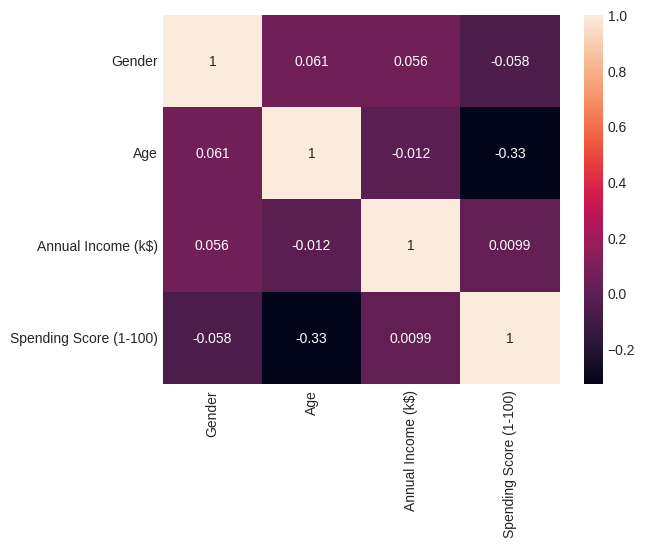

In [143]:
sns.heatmap(df.corr(),annot=True)

In [153]:
## Scale features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [154]:
X_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

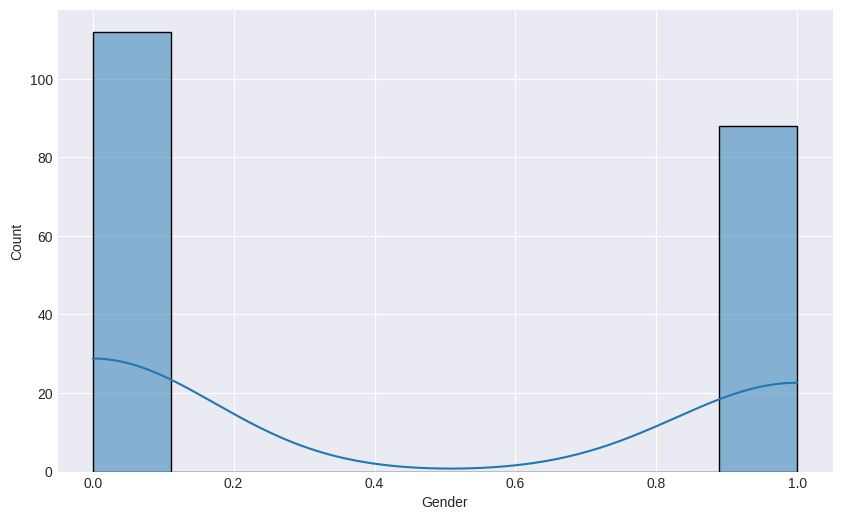

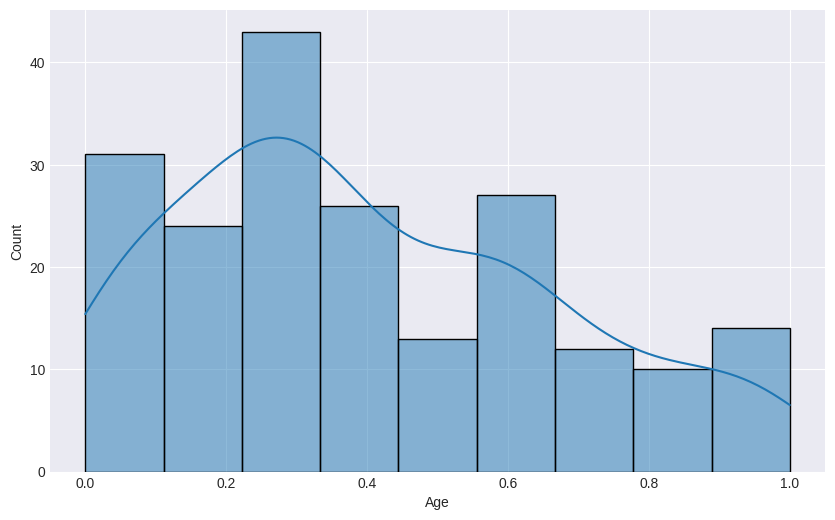

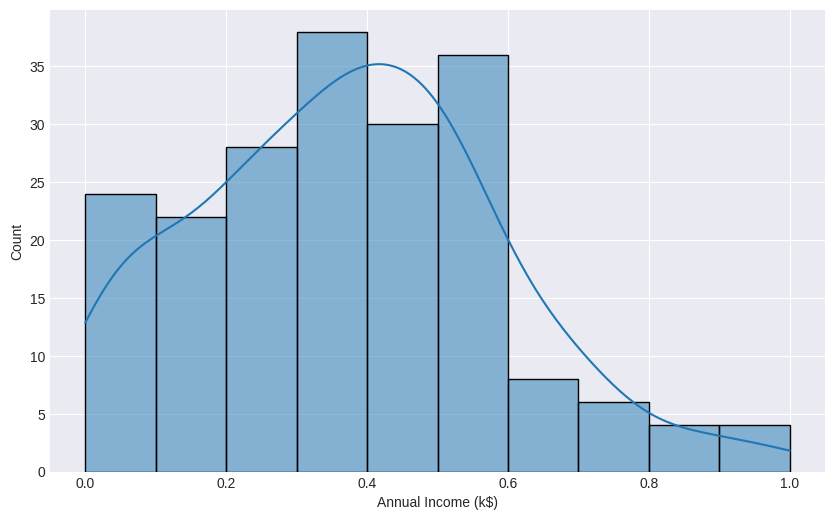

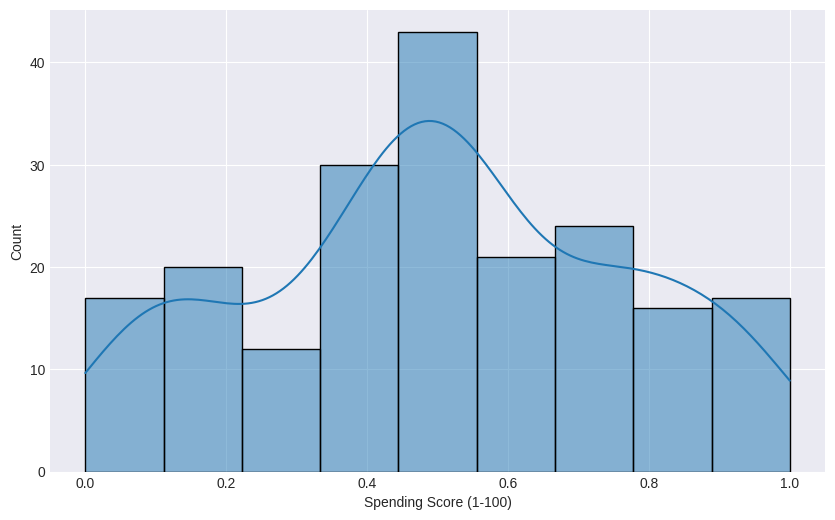

In [146]:
for cols in X_scaled.columns:
    plt.figure(figsize = (10,6))
    sns.histplot(X_scaled[cols],kde=True)

In [147]:
X_scaled.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Segmentation using Age and Spending Score

In [155]:
X1 = X_scaled[["Age","Spending Score (1-100)"]]

In [156]:
X1.head()

,Age,Spending Score (1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


Text(0, 0.5, 'WCSS')

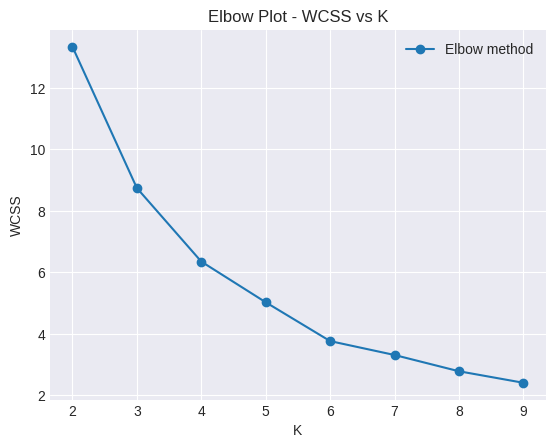

In [157]:
plt.style.use('seaborn-v0_8-darkgrid')
inertia = []
k_range = range(2,10)
for k in k_range:
    km = KMeans(n_clusters=k,random_state=42,init="k-means++",n_init = 10,max_iter=300,tol=0.0001,algorithm='elkan')
    km.fit(X1)
    inertia.append(km.inertia_)

plt.plot(k_range,inertia,marker="o",label="Elbow method")
plt.title("Elbow Plot - WCSS vs K")
plt.legend()
plt.xlabel("K")
plt.ylabel("WCSS")

In [165]:
km = KMeans(n_clusters=6,random_state=42,n_init=10)
km.fit(X1)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [167]:
X1["clusters"] = km.predict(X1)

/tmp/ipykernel_35/1006062147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1["clusters"] = km.predict(X1)


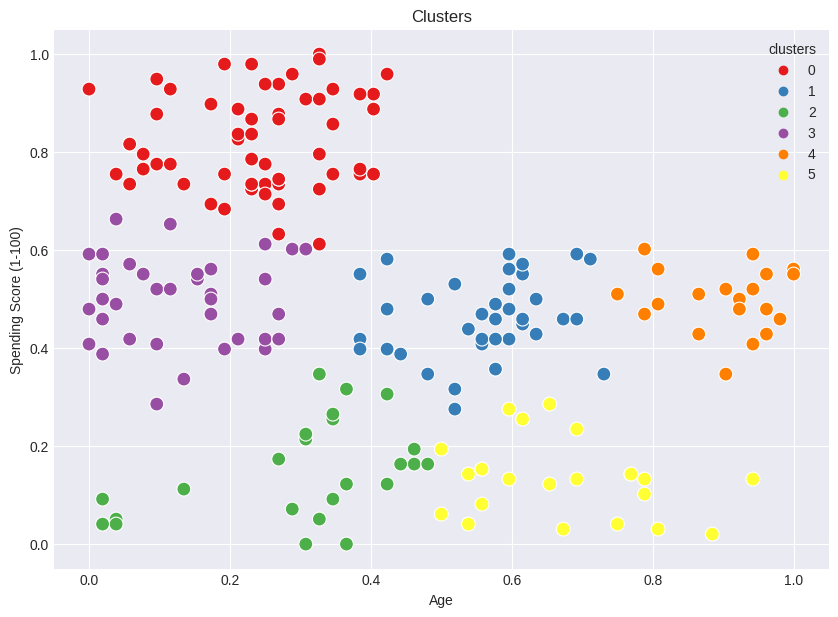

In [169]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='clusters', data=X1, palette='Set1', s=100)
plt.title('Clusters')
plt.show()

### Silhouette score for the above segmentation

In [173]:
from sklearn.metrics import silhouette_score

# After fitting your KMeans model:
score = silhouette_score(X1.drop("clusters",axis=1), km.labels_, metric='euclidean')
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.456


## Segmentation using Annual Income and Spending Score


In [185]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [186]:
X2 = X_scaled[["Annual Income (k$)","Spending Score (1-100)"]]

## Elbow method for Annual Income and Spending Score

Text(0, 0.5, 'WCSS')

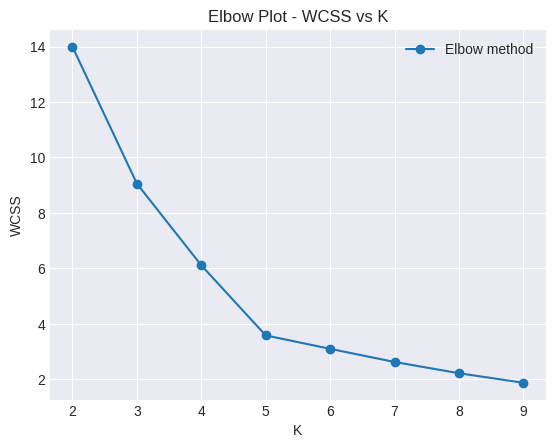

In [187]:
plt.style.use('seaborn-v0_8-darkgrid')
inertia = []
k_range = range(2,10)
for k in k_range:
    km = KMeans(n_clusters=k,random_state=42,init="k-means++",n_init = 10,max_iter=300,tol=0.0001,algorithm='elkan')
    km.fit(X2)
    inertia.append(km.inertia_)

plt.plot(k_range,inertia,marker="o",label="Elbow method")
plt.title("Elbow Plot - WCSS vs K")
plt.legend()
plt.xlabel("K")
plt.ylabel("WCSS")

### The elbow point is at 5 , so k = 5

### From visual inspect we can say that the sharpest drop in wcss occurs in between 2 and 5.

**After 5,the drop in wcss becomes gradual,so most probably the best k = 5**

/tmp/ipykernel_35/3050017036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2["clusters"] = km.predict(X2)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


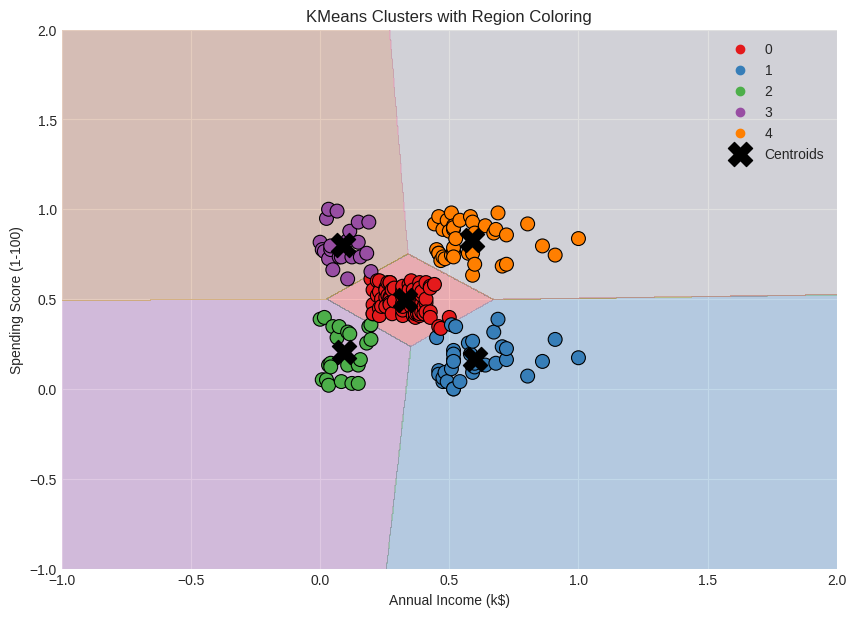

In [188]:
# Fit KMeans
km = KMeans(
    n_clusters=5,
    random_state=42,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001,
    algorithm='elkan'
)
km.fit(X2)
X2["clusters"] = km.predict(X2)

# Create meshgrid
x = X2["Annual Income (k$)"]
y = X2["Spending Score (1-100)"]
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000)
)

# Predict cluster for each point in meshgrid
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot colored regions (cluster zones)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')

# Scatter actual data points
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='clusters',
    palette='Set1',
    data=X2,
    s=100,
    edgecolor='black'
)

# Centroids
centroids = km.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)

# Final touches
plt.title('KMeans Clusters with Region Coloring')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


## Silhouette score for the above segmentation

In [189]:
# After fitting your KMeans model:
score = silhouette_score(X2.drop("clusters",axis=1), km.labels_, metric='euclidean')
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.559


## Segmentation for Age , Annual Income and Spending Score


In [192]:
X3 = X_scaled[["Age","Annual Income (k$)","Spending Score (1-100)"]]

### Elbow method for Age , Annual Income and Spending Score

Text(0, 0.5, 'WCSS')

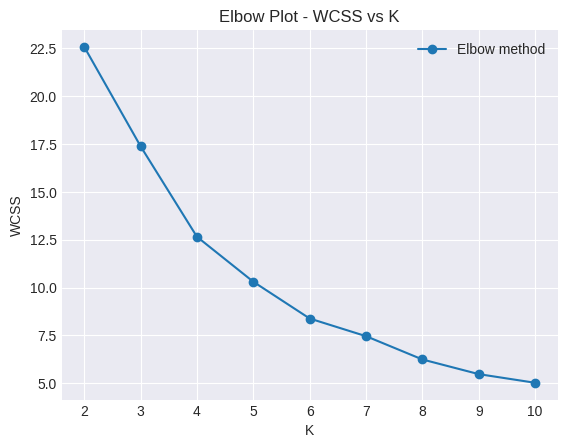

In [194]:
plt.style.use('seaborn-v0_8-darkgrid')
inertia = []
k_range = range(2,11)
for k in k_range:
    km = KMeans(n_clusters=k,random_state=42,init="k-means++",n_init = 10,max_iter=300,tol=0.0001,algorithm='elkan')
    km.fit(X3)
    inertia.append(km.inertia_)

plt.plot(k_range,inertia,marker="o",label="Elbow method")
plt.title("Elbow Plot - WCSS vs K")
plt.legend()
plt.xlabel("K")
plt.ylabel("WCSS")

### here the elbow point is at k=5

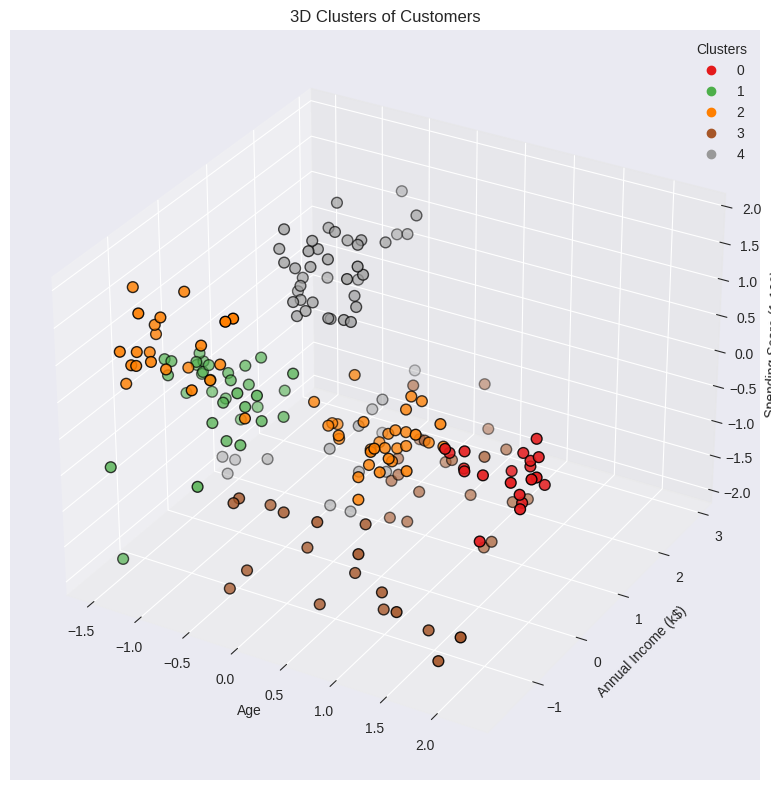

In [197]:
# Fit KMeans with optimal k=5
k_optimal = 5
km = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels = km.fit_predict(X3)

# Add cluster labels to original data
X3["Cluster"] = labels

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X["Age"],
    X["Annual Income (k$)"],
    X["Spending Score (1-100)"],
    c=X3["Cluster"],
    cmap='Set1',
    s=60,
    edgecolor='k'
)

ax.set_title("3D Clusters of Customers")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()


## Interactable 3d Plot

In [206]:

trace1 = go.Scatter3d(
    x= X3['Age'],
    y= X3['Spending Score (1-100)'],
    z= X3['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = X3['clusters'], 
        size= 20,
        line=dict(
            color= X3['clusters'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


### Silhouette for 3d segmentation

In [207]:
# After fitting your KMeans model:
score = silhouette_score(X3.drop("clusters",axis=1), km.labels_, metric='euclidean')
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.690
